In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [2]:
df = pd.read_table("C:/Users/Cemo/Desktop/Panteon - Game Data Analyst - Experiment Data.tsv")
df.head(15)

,Baseline,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention
1,19/09/2023,1080,981.00,1111,120,25%,7%
2,20/09/2023,1659,647.00,1662,56,30%,12%
3,21/09/2023,849,843.00,869,49,27%,14%
4,22/09/2023,741,172.00,1743,50,22%,9%
5,23/09/2023,1804,530.00,1881,203,32%,8%
6,24/09/2023,1599,7390.00,1635,84,28%,14%
7,25/09/2023,1997,965.00,2084,197,34%,15%
8,Variant,NaN,NaN,NaN,NaN,NaN,NaN
9,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention


In [3]:
df = df.drop(0).reset_index(drop=True)

In [4]:
df.columns = ["Date", "Installs", "Revenue", "Game Actions", "Crashes", "D1 Retention", "D7 Retention"]


In [5]:
df = df[~df["Date"].isin(["Variant", "Date"])].reset_index(drop=True)


In [6]:
df.head(14)

,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention
0,19/09/2023,1080,981.00,1111,120,25%,7%
1,20/09/2023,1659,647.00,1662,56,30%,12%
2,21/09/2023,849,843.00,869,49,27%,14%
3,22/09/2023,741,172.00,1743,50,22%,9%
4,23/09/2023,1804,530.00,1881,203,32%,8%
5,24/09/2023,1599,7390.00,1635,84,28%,14%
6,25/09/2023,1997,965.00,2084,197,34%,15%
7,19/09/2023,1051,1497.00,1103,9,26%,13%
8,20/09/2023,1157,3785.00,1222,44,31%,16%
9,21/09/2023,1502,313.00,1529,147,23%,8%


In [7]:
df = df[~df["Date"].isin(["Variant", "Date"])].reset_index(drop=True)


In [8]:
df["Installs"] = pd.to_numeric(df["Installs"].str.replace(",", ""), errors="coerce")
df["Revenue"] = pd.to_numeric(df["Revenue"].str.replace(",", ""), errors="coerce")
df["Game Actions"] = pd.to_numeric(df["Game Actions"].str.replace(",", ""), errors="coerce")
df["Crashes"] = pd.to_numeric(df["Crashes"].str.replace(",", ""), errors="coerce")

In [9]:
df["D1 Retention"] = pd.to_numeric(df["D1 Retention"].str.rstrip("%"), errors="coerce") / 100
df["D7 Retention"] = pd.to_numeric(df["D7 Retention"].str.rstrip("%"), errors="coerce") / 100


In [10]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)


In [11]:
mid_point = len(df) // 2
df["Group"] = ["Baseline" if i < mid_point else "Variant" for i in range(len(df))]


In [12]:
df_baseline = df[df["Group"] == "Baseline"].reset_index(drop=True)
df_variant = df[df["Group"] == "Variant"].reset_index(drop=True)

In [13]:
# Triple Double Check
df.head(14)


,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention,Group
0,2023-09-19,1080,981.0,1111,120,0.25,0.07,Baseline
1,2023-09-20,1659,647.0,1662,56,0.30,0.12,Baseline
2,2023-09-21,849,843.0,869,49,0.27,0.14,Baseline
3,2023-09-22,741,172.0,1743,50,0.22,0.09,Baseline
4,2023-09-23,1804,530.0,1881,203,0.32,0.08,Baseline
5,2023-09-24,1599,7390.0,1635,84,0.28,0.14,Baseline
6,2023-09-25,1997,965.0,2084,197,0.34,0.15,Baseline
7,2023-09-19,1051,1497.0,1103,9,0.26,0.13,Variant
8,2023-09-20,1157,3785.0,1222,44,0.31,0.16,Variant
9,2023-09-21,1502,313.0,1529,147,0.23,0.08,Variant


In [14]:
df_baseline.head(7)

,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention,Group
0,2023-09-19,1080,981.0,1111,120,0.25,0.07,Baseline
1,2023-09-20,1659,647.0,1662,56,0.30,0.12,Baseline
2,2023-09-21,849,843.0,869,49,0.27,0.14,Baseline
3,2023-09-22,741,172.0,1743,50,0.22,0.09,Baseline
4,2023-09-23,1804,530.0,1881,203,0.32,0.08,Baseline
5,2023-09-24,1599,7390.0,1635,84,0.28,0.14,Baseline
6,2023-09-25,1997,965.0,2084,197,0.34,0.15,Baseline


In [15]:
df_variant.head(7)

,Date,Installs,Revenue,Game Actions,Crashes,D1 Retention,D7 Retention,Group
0,2023-09-19,1051,1497.0,1103,9,0.26,0.13,Variant
1,2023-09-20,1157,3785.0,1222,44,0.31,0.16,Variant
2,2023-09-21,1502,313.0,1529,147,0.23,0.08,Variant
3,2023-09-22,1807,1822.0,1901,76,0.29,0.15,Variant
4,2023-09-23,1227,578.0,1237,198,0.21,0.10,Variant
5,2023-09-24,708,1111.0,786,184,0.34,0.20,Variant
6,2023-09-25,1507,748.0,1574,2,0.32,0.17,Variant


In [16]:
#df_baseline.reset_index(inplace=True)
#df_variant.reset_index(inplace=True)

In [17]:
#df_combined = pd.concat([df_baseline, df_variant])

In [18]:
df_baseline.set_index("Date", inplace=True)
df_variant.set_index("Date", inplace=True)

In [19]:
y_baseline = df_baseline["Revenue"]
X_baseline = df_baseline[["Installs", "Game Actions", "D1 Retention", "D7 Retention"]]

y_variant = df_variant["Revenue"]
X_variant = df_variant[["Installs", "Game Actions", "D1 Retention", "D7 Retention"]]

In [20]:
X_baseline = sm.add_constant(X_baseline)
X_variant = sm.add_constant(X_variant)

In [21]:
model_baseline = sm.OLS(y_baseline, X_baseline).fit()
model_variant = sm.OLS(y_variant, X_variant).fit()

In [22]:
print("Baseline Group Model Summary:")
print(model_baseline.summary())

Baseline Group Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1.431
Date:                Sun, 29 Sep 2024   Prob (F-statistic):              0.451
Time:                        17:28:44   Log-Likelihood:                -59.566
No. Observations:                   7   AIC:                             129.1
Df Residuals:                       2   BIC:                             128.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.25

C:\Users\Cemo\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [23]:
print("Variant Group Model Summary:")
print(model_variant.summary())

Variant Group Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                 -1.241
Method:                 Least Squares   F-statistic:                    0.1694
Date:                Sun, 29 Sep 2024   Prob (F-statistic):              0.936
Time:                        17:30:18   Log-Likelihood:                -57.837
No. Observations:                   7   AIC:                             125.7
Df Residuals:                       2   BIC:                             125.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1132.

C:\Users\Cemo\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [24]:
df_baseline["Predicted Revenue"] = model_baseline.predict(X_baseline)
df_variant["Predicted Revenue"] = model_variant.predict(X_variant)

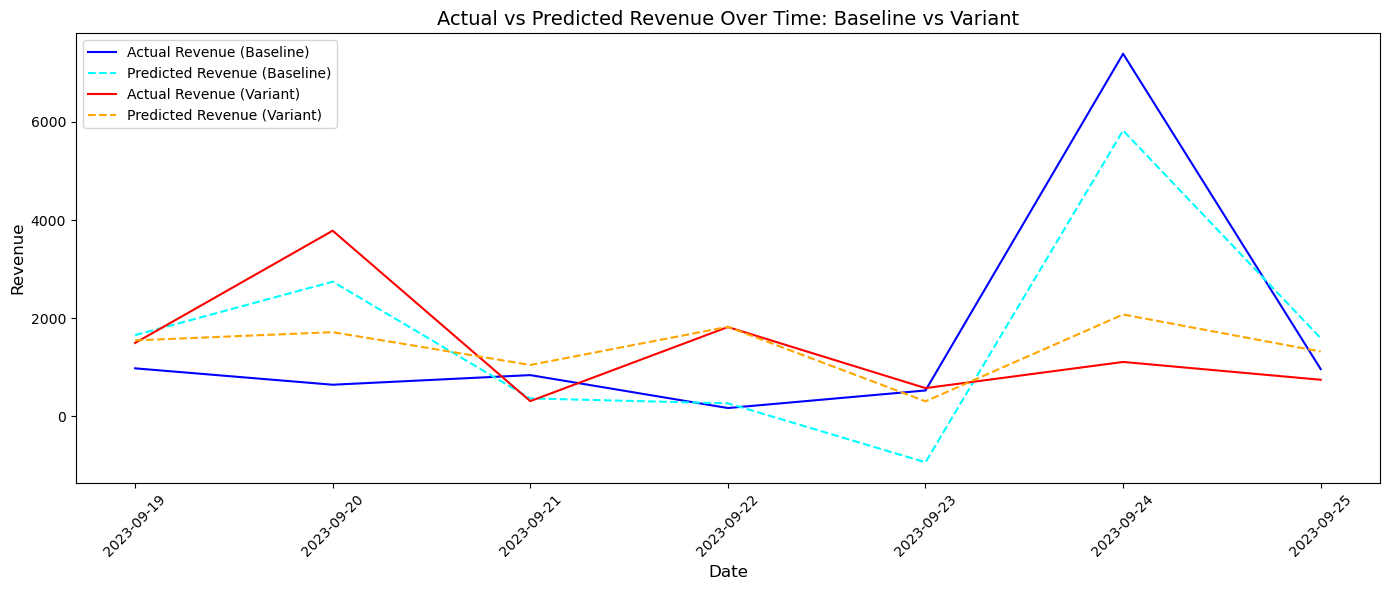

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(df_baseline.index, df_baseline["Revenue"], label="Actual Revenue (Baseline)", color="blue")
plt.plot(df_baseline.index, df_baseline["Predicted Revenue"], label="Predicted Revenue (Baseline)", linestyle="dashed", color="cyan")

plt.plot(df_variant.index, df_variant["Revenue"], label="Actual Revenue (Variant)", color="red")
plt.plot(df_variant.index, df_variant["Predicted Revenue"], label="Predicted Revenue (Variant)", linestyle="dashed", color="orange")

plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Actual vs Predicted Revenue Over Time: Baseline vs Variant", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()